In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

In [ ]:
!pip uninstall pyMelt

# Week 4 - (i) Trace elements in basalts; (ii) calc-alkaline vs tholeiitic trends

Before we move on to andesites, rhyolites, explosive volcanic deposits, and pluton formation (and I guess sedimentary and metamorphic rocks should be mentioned as well), we have one last aspect of basalts, or primary mantle melts more generally, that we need to look at.

Trace elements and radiogenic isotopes have been critical tools over the last 4 or 5 decades for investigating the origin of basaltic magmas, and the composition of their source regions (i.e., the underlying mantle). These data have demonstrated that mid-ocean ridge basalts, which form through melting of upwelling upper mantle material, sample a 'long term depleted' mantle reservoir; i.e., likely during the formation of the continental crust, melt was extracted from the early mantle leaving a residue with a depleted signature relative to the bulk earth. 

Ocean island basalts, on the other hand, appear to form from melting of a variety of sources - some of which are depleted (as in MORBs), some retain a primordial signature (in their He isotopes), and some possess characteristics expected for subducted crustal material that has been recycled throught the Earth's mantle. In general, it appears that OIBs are formed from melting of less depleted sources (relative to the depleted upper mantle), and lower extents of melting than typical for the formation of MORBs.

Finally, arc basalts (and primary arc andesites) typically contain elevated concentrations of trace elements that partition strongly into hydrous fluids (known as fluid-mobile trace elements). The largest group of fluid-mobile trace elements are the Large Ion Lithophile Elements (LILE), such as Ba or Rb. 

![alt text](https://ars.els-cdn.com/content/image/1-s2.0-S1674987119300428-gr2.jpg)

## Question 1 - Volcanic progression in ocean islands

Lets first look into more detail at ocean island basalts and how they evolve through time. To do this, we're going to compare data from Mauna Loa and Mauna Kea volcanoes on Hawai'i. Mauna Loa is currently in its shield phase of activity and, as typical for Hawaiian volcanoes in their 'main stage' erupts olivine tholeiites (last eruption in November to December 2022!). Mauna Kea is located to the north of Mauna Loa, slightly further from the centre of plume upwelling. Mauna Kea is less active and is now in its post-shield stage of activity, characterised by the infrequent eruption of alkali basalts at the surface. There are distinct trace element differences between the shield stage Mauna Loa lavas and the post-shield stage Mauna Kea lavas, lets try and think about why!

First lets load and plot the data (if you're doing this lab in a Jupyter Notebook you'll be able to modify plots/analyse the data yourselves).

**Actually first lets just look at a photo of the last Mauna Loa eruption taken from the summit of Mauna Kea**

![alt text](https://www.khon2.com/wp-content/uploads/sites/8/2022/12/thumbnail_ALOHA-AUTHENTIC-lava-and-snow-contrast-PKG.transfer_frame_4271.jpg?w=1280)

In [2]:
# load in spreadsheet as a pandas DataFrame. This keeps it in an 'excel' like format. 
# I've then shown the first 5 rows to give you an idea of how this might look.
Hawaii = pd.read_excel('Hawaii.xlsx')
Hawaii.head()

,Location,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,CaO_Liq,MgO_Liq,MnO_Liq,K2O_Liq,Na2O_Liq,...,Ta,Tl,Pb,Th,U,Nd143,Sr87,Pb206,Pb207,Pb208
0,Kilauea,73.220614,0.660257,13.076286,1.347629,0.034700,0.140900,0.017743,7.394843,4.012971,...,NaN,0.319400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kilauea,70.909600,1.294775,13.705550,2.974175,0.654850,0.403325,0.035850,4.848925,3.674025,...,6.44,0.208667,NaN,14.7500,5.2325,NaN,NaN,NaN,NaN,NaN
2,Kilauea,71.068650,0.884467,13.361300,4.666633,1.752333,0.524583,0.079817,3.483600,3.571800,...,3.12,0.146779,NaN,7.1825,2.5450,NaN,NaN,NaN,NaN,NaN
3,Kilauea,69.116400,1.116150,14.620017,2.997367,0.874133,0.607533,0.020667,6.824700,4.445817,...,2.37,0.222000,7.62,9.6300,1.9500,NaN,NaN,NaN,NaN,NaN
4,Kilauea,67.615714,1.499357,15.322814,3.155314,1.628957,0.785114,0.027800,4.526729,4.050471,...,NaN,0.257667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now plot the data. We're going to plot two things:

<ol>
    <li>A plot of MgO vs Ni, a trace element that is highly compatible in olivine.
    <li>A plot of MgO vs La, a highly incompatible trace element.
</ol>

Text(0, 0.5, 'La (ppm)')

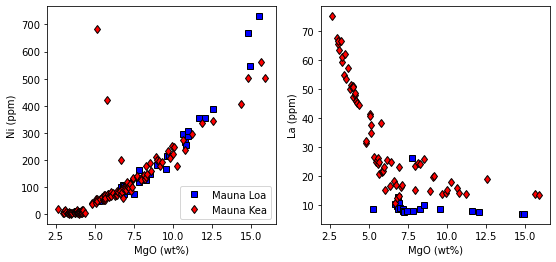

In [3]:
f, a = plt.subplots(1,2, figsize = (9,4))
a[0].plot(Hawaii['MgO_Liq'][Hawaii['Location'] == 'Mauna Loa'],
         Hawaii['Ni'][Hawaii['Location'] == 'Mauna Loa'],
         'sk', mfc = 'blue', label = 'Mauna Loa')
a[0].plot(Hawaii['MgO_Liq'][Hawaii['Location'] == 'Mauna Kea'],
         Hawaii['Ni'][Hawaii['Location'] == 'Mauna Kea'],
         'dk', mfc = 'red', label = 'Mauna Kea')

a[0].set_xlabel('MgO (wt%)')
a[0].set_ylabel('Ni (ppm)')
a[0].legend()

a[1].plot(Hawaii['MgO_Liq'][Hawaii['Location'] == 'Mauna Loa'],
         Hawaii['La'][Hawaii['Location'] == 'Mauna Loa'],
         'sk', mfc = 'blue')
a[1].plot(Hawaii['MgO_Liq'][Hawaii['Location'] == 'Mauna Kea'],
         Hawaii['La'][Hawaii['Location'] == 'Mauna Kea'],
         'dk', mfc = 'red')

a[1].set_xlabel('MgO (wt%)')
a[1].set_ylabel('La (ppm)')
#a[1].set_ylim([0, 30])

**(6 points)** Looking at the two graphs above, describe what is happening. Are the concentrations of Ni and La increasing or decreasing with magmatic differentiation (fractional crystallisation in this case)? Is this what you would expect to see for these two elements (bonus point if you can explain the 'kink' in the MgO vs La data for Mauna Kea).

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

**(6 points)** Using the graph on the RHS, estimate the La content of primary (i.e., unfractionated) mantle melts beneath Mauna Loa and Mauna Kea. You may wish to replot the data by uncommenting the 'set_ylim' line above if you're viewing this in the notebook.

**Hint** Primary mantle melts from Hawai'i often have ~16 wt% MgO, and it would be better to estimate a range of possible primary La contents for Mauna Kea, rather than a single value (notice that the data is more heterogeneous than for Mauna Loa - this is common for post-shield stage systems).

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

The primitive mantle (often invoked as an important source in the genesis of ocean island basalts) has a La content of ~0.687 ppm (Sun and McDonough, 1989). In the following calculations, we'll assume that basalts erupted at Mauna Loa and at Mauna Kea are produced from melting of the same mantle source with a composition similar to that of the primitive mantle.

**(15 points)** Therefore, using a source La concentration of 0.687 ppm, the Accumulated Fractional Melting equation listed below, and a partition coefficient for La during mantle melting of 0.001 ($D_{o}$), calculate the extent of melting ($F$) required to produce the La content of primary basaltic magmas beneath Mauna Loa and Mauna Kea.

$$ \frac{C_{melt}}{C_{Solid}^{o}} = \frac{1}{F}*(1-(1-F)^{\frac{1}{D_{o}}}) $$

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

**(10 points)** Using your results to the previous question, comment on whether shield stage basalts (Mauna Loa) or post-shield stage basalts (Mauna Kea) are formed by higher extents of melting. The post-shield basalts of Mauna Kea are alkali basalts whereas the shield stage basalts of Mauna Loa are classified as olivine tholeiites - is this consistent with the melt fraction estimates you generated above?

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

**(5 points)** What other factors, other than the extent of mantle melting, could influence the La content of primary mantle melts beneath Mauna Loa and Mauna Kea?

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

**(10 points)** Mauna Kea represents an older volcanic system than Mauna Loa. Using you results, explain how Mauna Loa and Mauna Kea fit into the traditionally model of volcanic evolution at ocean islands (i.e., describe the evolution of a volcanic system from the onset of volcanism to the last volcanic event).

**Hint** https://www.usgs.gov/observatories/hvo/evolution-hawaiian-volcanoes

![alt text](https://th-thumbnailer.cdn-si-edu.com/1batBygMQRJzLkaicvWHL6kMg8U=/fit-in/1072x0/https://tf-cmsv2-smithsonianmag-media.s3.amazonaws.com/filer/Hawaii-Islands-520.jpg)

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

## Question 2 - Subduction signature in IABs

Island and continental arc magmas display significant differences in their trace element systematics to most MORBs. These differences are observed in several different trace element groups, as well as radiogenic and stable isotope systematics. 

![alt text](https://ars.els-cdn.com/content/image/1-s2.0-S1674987119300428-gr6.jpg)

**(10 points)** Explain the process by which magmas are generated in the mantle wedge above subduction zones. What is meant by the term 'Hydrous Flux Melting'?

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

**(5 points)** The LILEs are generally considered to be 'fluid-mobile': i.e., they partition strongly into an aqueous fluid phase at the pressures and temperatures found in subduction zones. As a result, it is hypothesised that the mantle wedge beneath arc volcanoes becomes enriched in these trace elements when metamoprhic reactions in subducting slabs (both crust and mantle sections) causes dehydration and fluid loss in the downgoing slab.

On the diagram above, highlight at least 3 LILEs. 

**(5 points)** High Field Strength Elements (HFSEs) do not partition into aqueous fluids. Instead, these elements are typically retained in the subducting slab by the presence of accessory minerals (e.g., rutile) that strongly partiting these elements. On the diagram above, highlight (with a different color) the location of at least 2 HFSEs.

**(5 points)** At least three separate chemical components are believed to be important in the genesis of arc basalts. These include (i) the depleted mantle (i.e., the ambient mantle of the mantle wedge); and (ii) slab fluids. What is the third component included in the genesis of arc lavas?

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

**(10 points)** Primary arc lavas are often silica oversaturated (quartz tholeiites). In comparison MORBs are typically silica saturated (olivine tholeiites). Using phase diagrams and reference to the basalt tetrahedron explain why lavas generated by hydrous flux melting in subduction zones are typically silica oversaturated.

![alt text](https://upload.wikimedia.org/wikipedia/commons/8/82/Basalt_Tetrahedron.png)

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

# Calc-alkaline vs tholeiitic differentiation

For the rest of this practical we will investigate the origin of tholeiitic and calc-alkaline differentiation trends. The main theories for how calc-alkaline differentiation suites form include: (i) melt mixing - intrusion of basaltic lava into a rhyolitic magma; (ii) crustal melting/assimilation - crustal melts are often silica-rich, mixing of basalts with crustal melts could form the linear trends characteristic of calc-alkaline differentiation suites; (iii) variations in magmatic conditions and/or H$_2$O content control the differentiation sequence.

Evidence exists in support of all three hypotheses, but what we want to do in the rest of the lab is to investigate how, exactly, the third hypothesis might work. Tholeiitic trends are characterised by an increase in the FeO content of a magma prior to any significant increase in the melt SiO$_2$, Na$_2$O, or K$_2$O contents. This Fe-enrichment is not seen in calc-alkaline suites. Therefore, we're looking for some variable (e.g., pressure, H$_2$O content, oxygen fugacity) that controls the proportion of an Fe-poor, Si-rich mineral (tholeiite) and an Fe-rich, Si-poor mineral (calc-alkaline) crystallising from an arc magma. 

For a discussion on the calc-alkaline vs tholeiitic trend please read this article (https://doi.org/10.1093/petrology/egq062https://doi.org/10.1093/petrology/egq062)

![alt text](https://www.researchgate.net/profile/Mindy-Zimmer/publication/261511396/figure/fig1/AS:638063881515009@1529137692735/Discrimination-diagrams-for-tholeiitic-TH-and-calc-alkaline-CA-magma-series-a-AFM.png)

The Aleutians (with Augustine and Shishaldin volcanoes shown in the figure above) is an interesting place to study the origin of calc-alkaline and tholeiitic differentiation trends as both suites are found along the arc: calc-alkaline trends typically dominate in the NE, where volcanism displays more similarities to continental arc volcanism, rather than island arc volcanism (as in the SW where tholeiitic trends dominate). 

![alt text](https://www.avo.alaska.edu/volcanoes/intropics/aleumap.gif)

Moreover, work looking at several Aleutian volcanoes demonstrated that the tholeiitic index (THI), defined as the ratio of Fe at 4 wt% MgO compared to 8 wt% MgO, is correlated with the H$_2$O content of primitive arc magmas (data from Zimmer et al. 2010). 

**What we want to do here is understand the cause of this correlation. Why does H$_2$O content influence whether a volcano will have a tholeiitic or calc-alkalin differentiation trend, or is it a case of correlation does not equal causation!?**

![alt text](https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/petrology/51/12/10.1093_petrology_egq062/2/egq062f7.jpeg?Expires=1675107960&Signature=3hxnFlPBt0030iGoGwZ55WDiS8FgrlGEDYkX2o1L9OZD8ZH-lFLjLfXZwW1I8kgLaXUDfWLBf0eRU2NyGx862BOhJ7HHwJOhXd3j~~9b3nchy-sQmcjH7Xn9loey0GCTmeFjLM11Dbd4YSndW7Je6xbpnU9RBDzxr3FIczWS1dvCgu-i5iudSUhdrbnhjwUVMfoKC9oCSSM-meBXKVhisMfLXOJIo7hfgnDiqq2g6tLKREUXpOPhWY7DO02rHg~x~dVZcLIJMlNlHS2k8NyNraRChaMR0oEgkT-bb1rUcyCXpLQB7CGXweMQAuMkOCYfkqxpV8Nnl276mXysAw86iw__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA)



To answer this question, we need to do some modelling!

In igneous petrology, we often use a program called MELTS to simulate what happens during fractional crystallisation of a magma. MELTS is, in essence, a large thermodynamic database that solves, for a given temperature, pressure, and composition, the lowest energy state of the system (think back to lab 1, but imagine doing those calculations for a system that has 11 chemical components and could form over 50 different phases).

This allows us to use MELTS to predict what phases will crystallise from a magma at a given pressure and temperature. We don't need to worry too much about what is going on in the background of MELTS (there are very few people that truly understand this). What we do need to know is that MELTS represents one of the best models for predicting phase stability in igneous systems. It is far from perfect, but it does correctly predict the overall influence of internal parameters (such as pressure of melt H$_2$O content) on phase stability.

Another important factor is that new developments allow the MELTS algorithms to be easily be accessed from Python3! This means that we can use MELTS to investigate the influence of melt H$_2$O contents on calc-alkaline vs tholeiitic differentiation in the lab! 

First thing we need to do is make sure that we have the MELTS packages installed. This includes installing the latest version of pyMELTScalc - a 'frontend' application that allows us to access the MELTS algorithms. This can be installed using (just remove the '#'):

In [4]:
#!pip install "https://github.com/gleesonm1/pyMELTScalc/archive/refs/tags/v0.0.17.zip"

Next, you need to make sure that the MELTS database files, which are available on bcourses, are downloaded an placed somewhere on your PC/Mac. It'll be easiest if the MELTS folder on bcourses is downloaded and placed in the same folder as this notebook - then you need to make sure Python known where to find the MELTS files. This is done using:

In [5]:
import sys
sys.path.append('MELTS')

Now we have all the required code, so we can start thinking about the calculations we want to run. TO run a fractional crystallisation model, we need a few different things. Most importantly, we need an initial melt/magma composition. For these calculations we'll use a high-MgO melt composition measured in a plagioclase-hosted melt inclusion from Okmok volcano (which lies near the tholeiitic - calc-alkaline divide). True data from both Augustine and Shishaldin volcanoes are also loaded:

In [6]:
# First load the real-world data
Aleutians = pd.read_excel("Aleutians.xlsx")
Aleutians['Na+K'] = Aleutians['Na2O_Liq'] + Aleutians['K2O_Liq']

# Split into 2 dataframes, one for each volcano
Augustine = Aleutians.copy()
Augustine = Augustine[Augustine['Volcano'] == "Augustine"]
Augustine = Augustine.reset_index(drop = True)

Shishaldin = Aleutians.copy()
Shishaldin = Shishaldin[Shishaldin['Volcano'] == "Shishaldin"]
Shishaldin = Shishaldin.reset_index(drop = True)

# compositions are inputed as a dictionary
comp = {'SiO2_Liq': 50.04,
       'TiO2_Liq': 0.81,
       'Al2O3_Liq': 15.01,
       'FeOt_Liq': 9.62,
       'MnO_Liq': 0.16,
       'MgO_Liq': 7.28,
       'CaO_Liq': 11.52,
       'Na2O_Liq': 2.54,
       'K2O_Liq': 0.30,
       'P2O5_Liq': 0.06}

We also need to define the pressure of crystallisation, the oxygen fugacity of the melt, and the final temperature of the model (calculations will start at the melt liquidus). For these calculations, we'll assume crystallisation at 3500 bars (~10 - 12 km depth), with an oxygen fugacity at 0.5 log units below the FMQ buffer. The final temperature of the crystallisation model is set at 850$^o$C.

In [7]:
P_bar = 4500
T_end_C = 900
fO2_buffer = "FMQ"
fO2_offset = -0.5

With this information, we can now run a fractional crystallisation model and plot up the results. Fractional crystallisation calculations are performed using the pyMELTScalc package and the 'multi_path' function:

In [8]:
import pyMELTScalc as M
Results = M.multi_path(Model = "MELTSv1.0.2", comp = comp, 
                       P_bar = P_bar, T_end_C = T_end_C, fO2_buffer = fO2_buffer, fO2_offset = fO2_offset,
                      dt_C = 2, find_liquidus = True, Frac_solid = True, Frac_fluid = True)

# the first 2 lines of this function involve loading in all the parameters we just set out (e.g., composition)
# the final line of the code tells it to perform fractional crystallistaion starting at the melt liquidus

Warning: Adding small amounts of H$_{2}$O may improve the ability of MELTS to accurately reproduce the saturation of oxide minerals. Additionally, sufficient H$_{2}$O is required in the model for MELTS to predict the crystallisation of apatite, rather than whitlockite.

Opps!

You probably got an error when you tried to run that line. That's because the MELTS algorithms arn't particular good when no water is included in the MELTS algorithm. Lets try that again, but this time we'll define a new parameter 'H2O_Liq', the H2O content of the initial melt phase. We'll start with a H$_2$O content of 2 w%, approximately the minimum H$_2$O content found in primary melts from any of the Aleutian volcanoes.

In [9]:
H2O_Liq = 2
Results = M.multi_path(Model = "MELTSv1.2.0", comp = comp, H2O_Liq = H2O_Liq,
                       P_bar = P_bar, T_end_C = T_end_C, fO2_buffer = fO2_buffer, fO2_offset = fO2_offset,
                      dt_C = 2, find_liquidus = True, Frac_solid = True, Frac_fluid = True)

Running MELTSv1.2.0 calculation... Complete (time taken = 30.09 seconds)

Depending on your computer, that model should take about 30 - 50 seconds. If it's taking much much longer let me know!

We can now look at the results. We'll be doing this by looking the classic plot of FeO$_t$/MgO vs SiO$_2$ and comparing our results to data from Augustine and Shishaldin, the archetypal calc-alkaline and tholeiitic systems of the Aleutian arc:

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


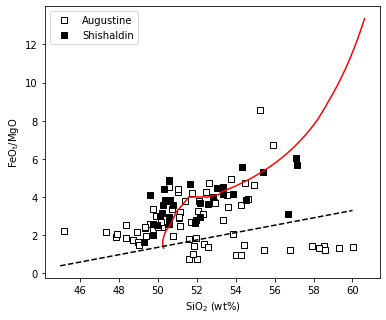

In [10]:
# first plot the real-world data.
f, a = plt.subplots(1,1, figsize = (6,5))
a.plot(Augustine['SiO2_Liq'], 
       Augustine['FeOt_Liq']/Augustine['MgO_Liq'],
       'sk', mfc = 'w', label = "Augustine")

a.plot(Shishaldin['SiO2_Liq'], 
       Shishaldin['FeOt_Liq']/Shishaldin['MgO_Liq'],
       'sk', mfc = 'k', label = "Shishaldin")

# now add in the MELTS results
a.plot(Results['All']['SiO2_Liq'],
      Results['All']['FeOt_Liq']/Results['All']['MgO_Liq'],
      '-r')

# add in T-CA divide
a.plot([45, 60], [0.4, 3.3], '--k')

# add in labels and legend
a.set_xlabel('SiO$_2$ (wt%)')
a.set_ylabel('FeO$_t$/MgO')
a.legend()

The results here clearly show the MELTS predictions staying on the tholeiite side of the T-CA divide. 

**(40 points)** Repeat these calculations with different H$_2$O contents (i.e., change H2O_Liq) and replot the results. Can changing H$_2$O contents shift the differentiation trend from tholeiite to calc-alkaline? 

In addition to the FeO/MgO vs SiO2 diagram, also plot MgO (x-axis) vs FeO, Al2O3, and TiO2 (and any other oxides you think might be useful; example below) for each model. Try also plotting the MgO content against the mass of each phase. Using this information describe how the H$_2$O content of the melt influences the stability of plagioclase (**contains ~30wt% Al$_2$O$_3$**) and oxides (spinel; **contain no SiO$_2$**). Does the melt H$_2$O content influence the Fe-enrichment seen? Why?

**Hint** to access the mass of each phase at each step type: Results['Mass']

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

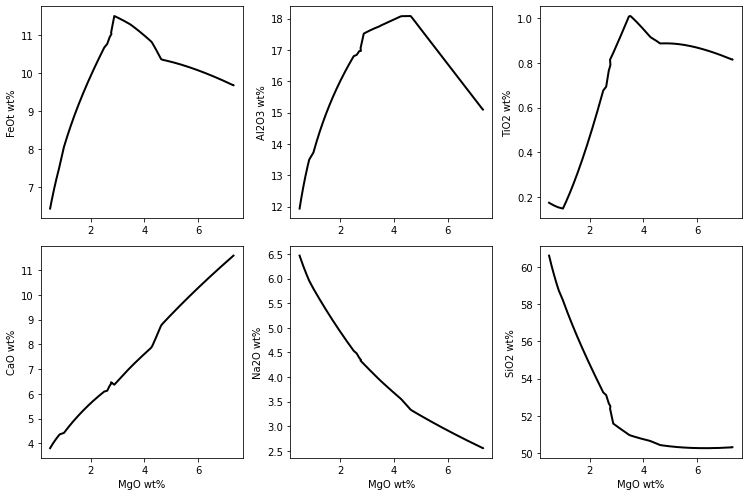

In [11]:
# Example of MgO variation diagrams (this is using a function built into pyMELTScalc so it's easy!)
M.harker(Results = Results, x_axis = "MgO", y_axis = ['FeOt', 'Al2O3', 'TiO2', 'CaO', 'Na2O', 'SiO2'])

Text(0, 0.5, 'Mass of Oxide (%)')

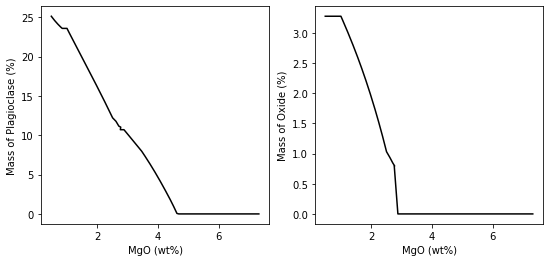

In [14]:
f, a = plt.subplots(1,2, figsize = (9,4))
a[0].plot(Results['All']['MgO_Liq'],
         Results['Mass']['plagioclase1_sum'], '-k')
a[0].set_xlabel('MgO (wt%)')
a[0].set_ylabel('Mass of Plagioclase (%)')

a[1].plot(Results['All']['MgO_Liq'],
         Results['Mass']['spinel1_sum'], '-k')
a[1].set_xlabel('MgO (wt%)')
a[1].set_ylabel('Mass of Oxide (%)')

**(30 points)** Globally, the H$_2$O content of mantle melts appears to correlate with their oxygen fugacity (which controls he Fe$^{3+}$/Fe$_{tot}$ ratio of magmas). Try varying the fO2_offset value in the MELTS calculations and see how this influences the differentiation trends. Does the *f*O$_2$ of the system influence whether a calc-alkaline or tholeiitic differentiation trend is seen (and can you explain why)?

**hint 1** re-run the models, but this time vary the fO2_offset parameter from -2 to 2. Keep H$_2$O at 4 wt%.

**hint 2** plot up the MgO vs oxide and MgO vs phase mass diagrams again. Focus on the rise in SiO$_2$ in oxidised models and what causes this.

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)

**(10 points)** Comment on your results and how these relate to the correlation between H$_2$O and the THI index in Zimmer et al. (2010). A good idea would be to look at figures 7b and 9a in Zimmer et al. (2010). https://doi.org/10.1093/petrology/egq062https://doi.org/10.1093/petrology/egq062

![alt text](https://blog.trueaccord.com/wp-content/uploads/2019/08/plain-white-rectangle.png)